# C964 CAPSTONE 
# MAKE SURE TO RUN ALL THE CELLS FROM THE MENU CELL THEN RUN ALL
PLEASE IGNORE THE CODE AND HEAD DOWN TO THE GUI SECTION

In [1]:
# The standard libraries are being imported.
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

# For plotting offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# For creating a regression model
from sklearn.model_selection import train_test_split

# For Preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# GGPLOT serves as the plot's theme.
plt.style.use('ggplot')

# sklearn's linear regression model
from sklearn.linear_model import LinearRegression

In [2]:
# Importing the data
btc = pd.read_csv("Bitcoin Historical Data.csv")
# To reset the data, use the resest data function.
def load():
    global btc
    btc = pd.read_csv("Bitcoin Historical Data.csv")

In [3]:
# function to make the DATA CORRECTION EASIESR
def fix_data(btc):
    # Converting the data to DATATIME data type JSUT FOR DATES
    btc["Date"] = pd.to_datetime(btc["Date"])
    # Replacing the K and M with zeros to make the VOlUME CORECT AND converting to int
    btc["Vol."] = btc["Vol."].replace({'K': '*1e3', 'M': '*1e6', '-':'-1'}, regex=True).map(pd.eval).astype(int)
    # REmoving the ,
    btc["Price"] = btc["Price"].replace(",", "", regex=True).astype(float)
    btc["Open"] = btc["Open"].replace(",", "", regex=True).astype(float)
    btc["High"] = btc["High"].replace(",", "", regex=True).astype(float)
    btc["Low"] = btc["Low"].replace(",", "", regex=True).astype(float)
    # REMOVIGN THE % and coverting value to float
    btc["Change %"] = btc["Change %"].replace("%","",regex=True).astype(float)  
# Fix data on start
fix_data(btc)
btc = btc.iloc[::-1].reset_index(drop =True)

# THE LAYOUT FOR THE CHARTS
layout = go.Layout(
            title="Bitcoin Price",
            xaxis=dict(title="Date",
                    titlefont=dict(
                    family="Roboto Condensed, monospace",
                    size=15,
                    color="#e8670c"
                )
            ),
            yaxis=dict(title="Price",
                    titlefont=dict(
                    family="Roboto Condensed, monospace",
                    size=15,
                    color="#730ce8"
                )
            )
)
# LINEAR REGRESSION MACHINE LEARNING TREND PREDICTOR FUNCTION
def linearRegression():
    # Separate the data into training and testing sets.
    X = np.array(btc.index).reshape(-1,1)
    Y = btc["Price"]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)# test data 30%

    # Scaling of features
    scaler = StandardScaler().fit(X_train)

    # Developing a linear model
    lm = LinearRegression()
    lm.fit(X_train, Y_train)
    trace0 = go.Scatter(x= X_train.T[0],y= Y_train,mode = "markers",name = "Actual")
    trace1 = go.Scatter(x= X_train.T[0],y= lm.predict(X_train).T,mode = "lines",name = "Predicted")
    btc_data = [trace0,trace1]
    layout.xaxis.title.text = "Day"
    plot2 = go.Figure(data=btc_data, layout=layout)
    iplot(plot2)
    
    print("R2_score Train: " , r2_score(Y_train, lm.predict(X_train)), "R2_score Test: " ,r2_score(Y_test, lm.predict(X_test)))
    print("Mean Squared Error Train : " , mse(Y_train, lm.predict(X_train)) ,"Mean Squared Error Test : " , mse(Y_test, lm.predict(X_test)))

    
    
# PLOT THE CHART OF PRICE
def chart():
    btc_data = [{'x':btc["Date"], 'y':btc["Price"]}]
    plot = go.Figure(data=btc_data, layout=layout)
    iplot(plot)
# Descriptive trend checker
def trend():
    x = btc["Price"].min() - btc["Price"].max()
    if x < 0:
        return "Up Trend"
    else:
        return "Down Trend"

In [4]:
# Info text box
text = widgets.Textarea(
    value='''The controls above allow you to manipulate the data and specify the area on which to run the linear region model.
Start: specify the start day
End: specify the end of the data
Slice: Preform the slice on the data
Reset Data: reset the data to its original, sparse, and uncleaned state
Clean Data: Cleans the data and converts the various objects to their types
DISCLAIMER: THE DATA SET CONTAINS 3982 DAYS.''',
    placeholder='Type something',
    description='',
    disabled=True
)
# The remainder code are GUI buttons and their functions.
output_text = widgets.Text(description = 'Predict:',disabled =True)
int_range = widgets.IntSlider(min=0,
    max=len(btc),description='Start:')
output2 = widgets.Output()

display(text,int_range, output2)
x33 =0
def on_value_change(change):
    global x33
    with output2:
        x33 = change['new']
        
int_range1 = widgets.IntSlider(min=0,
    max=len(btc),description='End:')
output21 = widgets.Output()

display(int_range1,output_text, output21)

def on_value_change1(change):
    global x22
    with output2:
        x22 = change['new']
        
button1 = widgets.Button(description="Reset Data")
output1 = widgets.Output()

button2 = widgets.Button(description="Clean Data")
output2 = widgets.Output()

button3 = widgets.Button(description="Show Trend")
output3 = widgets.Output()


def on_button_clicked3(b):
    with output3:
        trend()
        output_text.value = trend()
        
#button 2
def on_button_clicked2(b):
    global btc
    with output2:
        fix_data(btc)
        btc = btc.iloc[::-1].reset_index(drop =True)

#button1
def on_button_clicked1(b):
    with output1:
        load()

       
button = widgets.Button(description="Slice")
output = widgets.Output()

display(button,button1,button2,button3, output)
#button
def on_button_clicked(b):
    global btc
    with output:
        btc = btc[x33:x22]

       
button3.on_click(on_button_clicked3)
button2.on_click(on_button_clicked2)
button1.on_click(on_button_clicked1) 
button.on_click(on_button_clicked)
int_range.observe(on_value_change, names='value')
int_range1.observe(on_value_change1, names='value')

Textarea(value='The controls above allow you to manipulate the data and specify the area on which to run the l…

IntSlider(value=0, description='Start:', max=3983)

Output()

IntSlider(value=0, description='End:', max=3983)

Text(value='', description='Predict:', disabled=True)

Output()

Button(description='Slice', style=ButtonStyle())

Button(description='Reset Data', style=ButtonStyle())

Button(description='Clean Data', style=ButtonStyle())

Button(description='Show Trend', style=ButtonStyle())

Output()

##### DISCLAIMER: TO GET THE MOST ACCURATE READING, RESET AND CLEAN THE DATA EVERY TIME YOU SLICE.
# GUI
## RUN EACH CELL BELLOW TO SEE THE DATA


In [12]:
btc

,Date,Price,Open,High,Low,Vol.,Change %
0,2011-01-01,0.3,0.3,0.3,0.3,2820,0.00
1,2011-01-02,0.3,0.3,0.3,0.3,5350,0.00
2,2011-01-03,0.3,0.3,0.3,0.3,1430,0.00
3,2011-01-04,0.3,0.3,0.3,0.3,1880,0.00
4,2011-01-05,0.3,0.3,0.3,0.3,360,0.00
...,...,...,...,...,...,...,...
3978,2021-11-22,56308.8,58719.7,59288.3,55656.8,76450,-4.10
3979,2021-11-23,57573.2,56304.8,57855.1,55542.5,72480,2.25
3980,2021-11-24,57171.7,57559.4,57697.4,55910.6,56680,-0.70
3981,2021-11-25,58935.1,57167.1,59387.3,57029.8,56790,3.08


In [6]:
chart()

Data Visulation 1
Open ,High , Low, Price Bar Graph


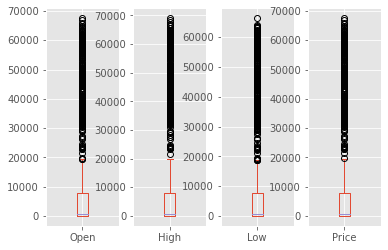

In [7]:
print("Data Visulation 1")
print("Open ,High , Low, Price Bar Graph")
btc[["Open","High","Low","Price"]].plot(subplots=True,kind ="box");

Data Visulation 2
Percentage change VS Volume Scatter Plot


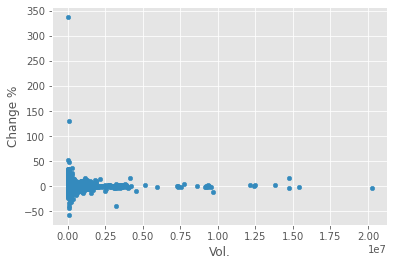

In [8]:
print("Data Visulation 2")
print("Percentage change VS Volume Scatter Plot")
btc.plot(x="Vol.",y="Change %",kind ="scatter");

Data Visulation 3
Price Open High Stackplot Chart


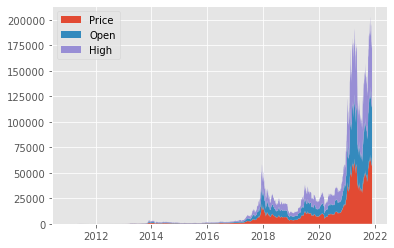

In [9]:
print("Data Visulation 3")
print("Price Open High Stackplot Chart")
plt.stackplot(btc["Date"],btc["Price"], btc["Open"], btc["High"], labels=['Price','Open','High'])
plt.legend(loc='upper left');

In [10]:
print("Price VS Predicted Linear Trend")
linearRegression()

Price VS Predicted Linear Trend


R2_score Train:  0.44489249182146673 R2_score Test:  0.4344177227679904
Mean Squared Error Train :  97826716.42414312 Mean Squared Error Test :  94874461.20130712


#### R2_score has a best score of 1.0 and a worst of 0